In [14]:
from bs4 import BeautifulSoup as bs
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [42]:
stopwords = set([word.strip() for word in open('datasets/stopwords.txt')])
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
'third', 'second', 'fourth', })
def myCustomTokenizer(line):
    line = line.lower()
    words = nltk.tokenize.word_tokenize(line)
    words = [word for word in words if word not in stopwords]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if len(word)>2]
    words = [word for word in words if not any(c.isdigit() for c in word)]
    return words

In [54]:
word2idx = {}
current  = 0

tokens_list = []
with open('datasets/all_books_titles.txt') as f:
    for line in f:
        line = line.rstrip()
        if line is not None:
            try:
                tokens = myCustomTokenizer(line)
                tokens_list.append(tokens)
                for token in tokens:
                        if token not in word2idx:
                            word2idx[token] = current
                            current += 1
            except:
                pass
#make the term document matrix
td_matrix = np.zeros((len(word2idx),len(tokens_list)))
document_num = 0
for tokens in tokens_list:
    for token in tokens:
        td_matrix[word2idx[token]][document_num] = 1
    document_num += 1

In [55]:
svd = TruncatedSVD()

In [56]:
reduced = svd.fit_transform(td_matrix)

In [57]:
reduced.shape

(2066, 2)

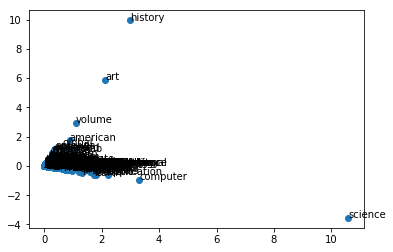

In [59]:
plt.scatter(reduced[:,0],reduced[:,1])
for key in word2idx.keys():
    idx = word2idx[key]
    plt.annotate(s=key,xy=(reduced[idx][0],reduced[idx][1]))
plt.show()